# **Unified Mentor Internship**

# Project 2:Foreign Direct Investment Analytics

##**Objective**: Use data analysis techniques to analyse FDIs from year 2000-2017.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# prep
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

IMPORTING DATA

In [ ]:
#reading in CSV's from a file path
train_df = pd.read_csv('/content/FDI data.csv')

PERFORMING EDA

In [ ]:
train_df.shape

(63, 18)

In [ ]:
col=train_df.columns
col

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [ ]:
train_df.head(4)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [ ]:
train_df.describe()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,37.757302,63.931587,42.925714,34.727778,51.090317,87.932540,198.281905,390.085714,498.348571,410.069524,339.413810,557.472698,355.930000,385.703492,490.959841,634.936349,690.131111
std,112.227860,157.878737,86.606439,67.653735,101.934873,206.436967,686.783115,1026.249935,1134.649040,926.814626,627.141139,1031.474056,778.091368,658.429944,837.787060,1335.307706,1411.965354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,0.215000,0.715000,1.230000,4.160000,9.950000,11.950000,7.880000,8.430000,22.720000,15.115000,16.610000,33.800000,30.000000,19.905000
50%,4.030000,5.070000,11.010000,6.370000,9.090000,22.620000,25.820000,58.820000,84.880000,69.740000,58.070000,129.360000,95.410000,113.780000,177.220000,159.130000,110.860000
75%,23.510000,44.830000,36.555000,38.660000,43.205000,63.855000,108.325000,279.270000,383.320000,341.595000,304.280000,593.525000,288.025000,473.060000,595.390000,519.070000,741.220000
max,832.070000,873.230000,419.960000,368.320000,527.900000,1359.970000,4713.780000,6986.170000,6183.490000,5466.130000,3296.090000,5215.980000,4832.980000,3982.890000,4443.260000,6889.460000,8684.070000


CLEANING DATA(DATA PREPROCESSING)

In [ ]:
#cheching for any null values
train_df.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [ ]:
# Scaling FDI for Year 2000-01
scaler = MinMaxScaler()
train_df['2000-01'] = scaler.fit_transform(train_df[['2000-01']])
train_df['2000-01'].head()

0    0.027269
1    0.001586
2    0.107467
3    0.000000
4    0.000000
Name: 2000-01, dtype: float64

In [ ]:
train_df['Sector']

0                              METALLURGICAL INDUSTRIES
1                                                MINING
2                                                 POWER
3                               NON-CONVENTIONAL ENERGY
4                                       COAL PRODUCTION
                            ...                        
58    PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...
59                                                 COIR
60             CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES
61    CONSTRUCTION DEVELOPMENT: Townships, housing, ...
62                             MISCELLANEOUS INDUSTRIES
Name: Sector, Length: 63, dtype: object

# For One Year, distribution of FDI in various sectors:

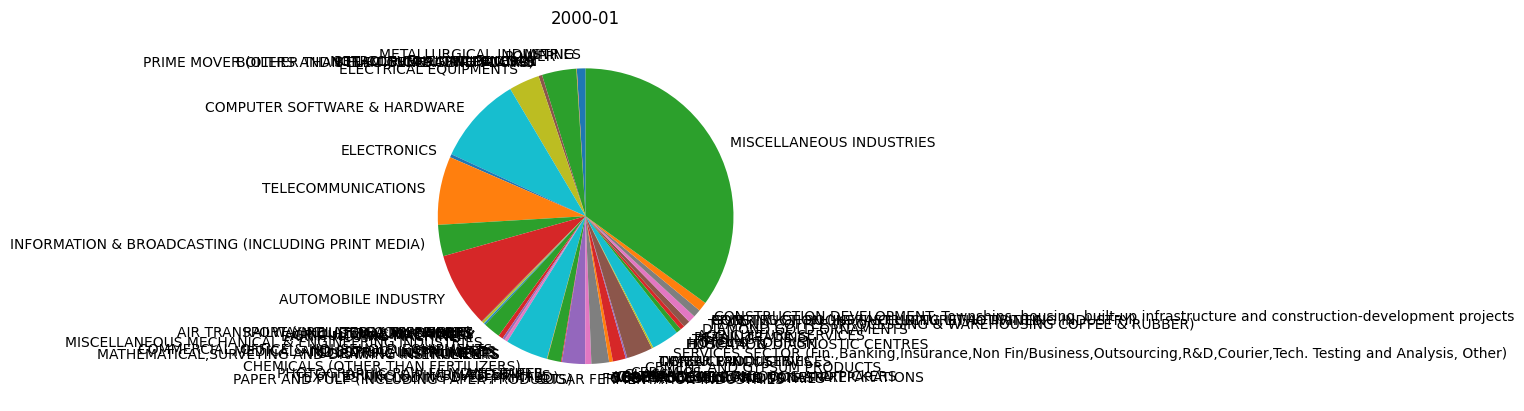

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y = train_df['2000-01']
y
plt.pie(y, labels=train_df['Sector'], startangle = 90)
plt.title("2000-01")
plt.show()

## Making a convenience function

Year 2000-01
Year 2001-02
Year 2002-03
Year 2003-04
Year 2004-05
Year 2005-06
Year 2006-07
Year 2007-08
Year 2008-09


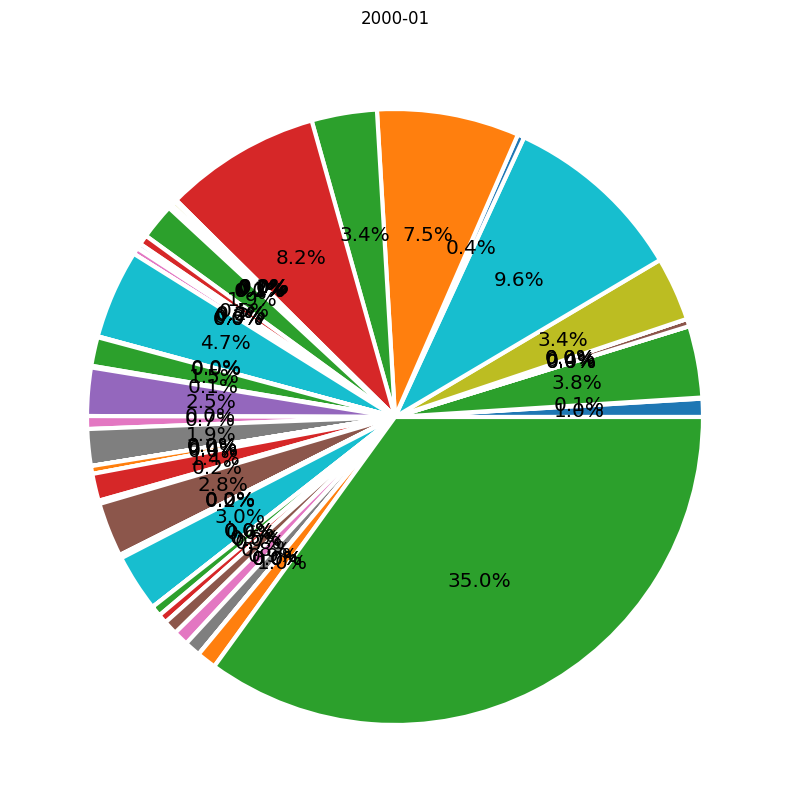

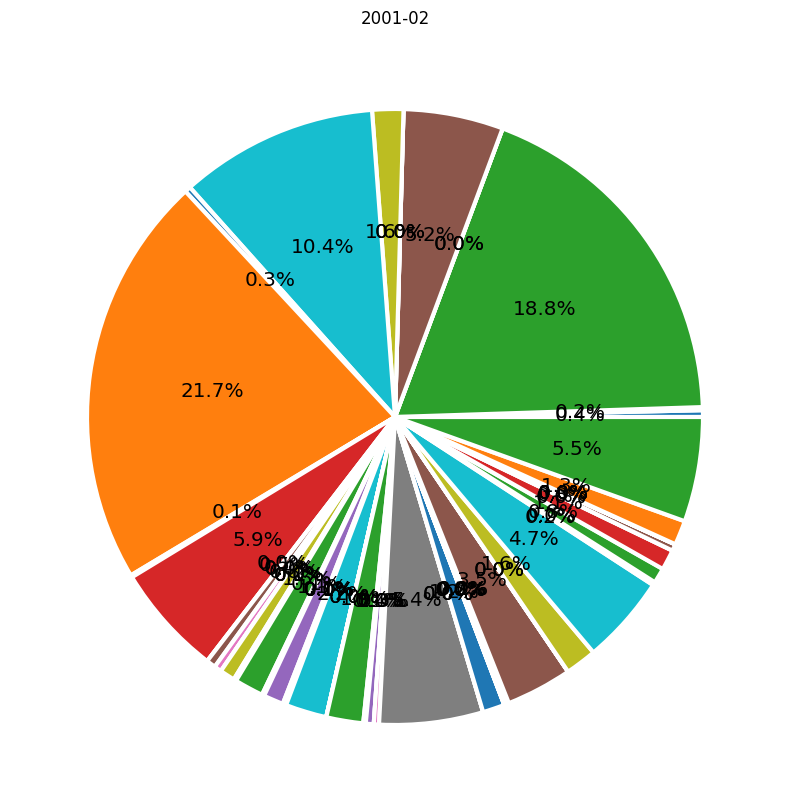

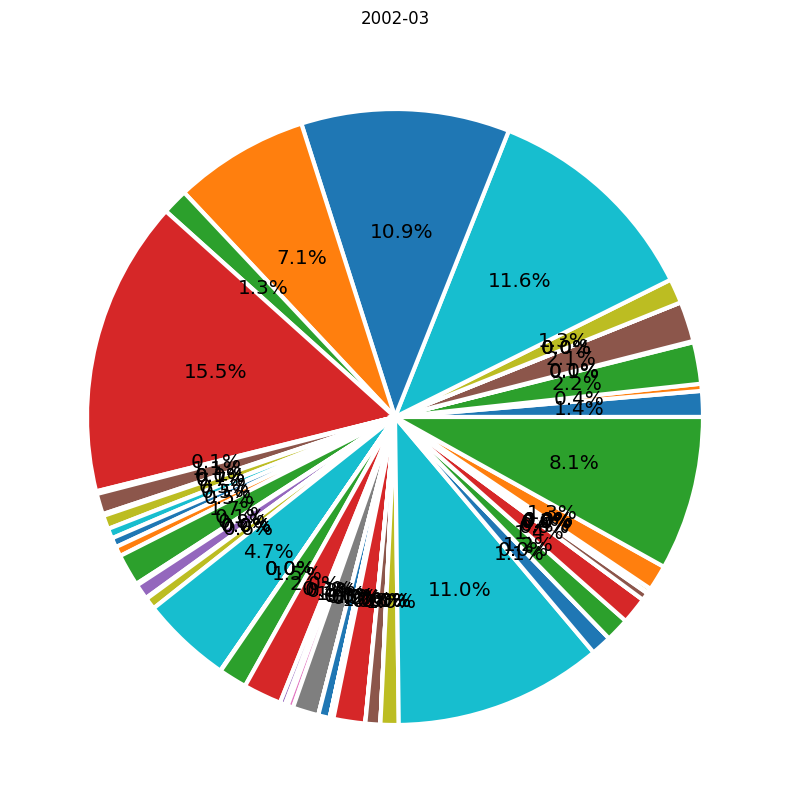

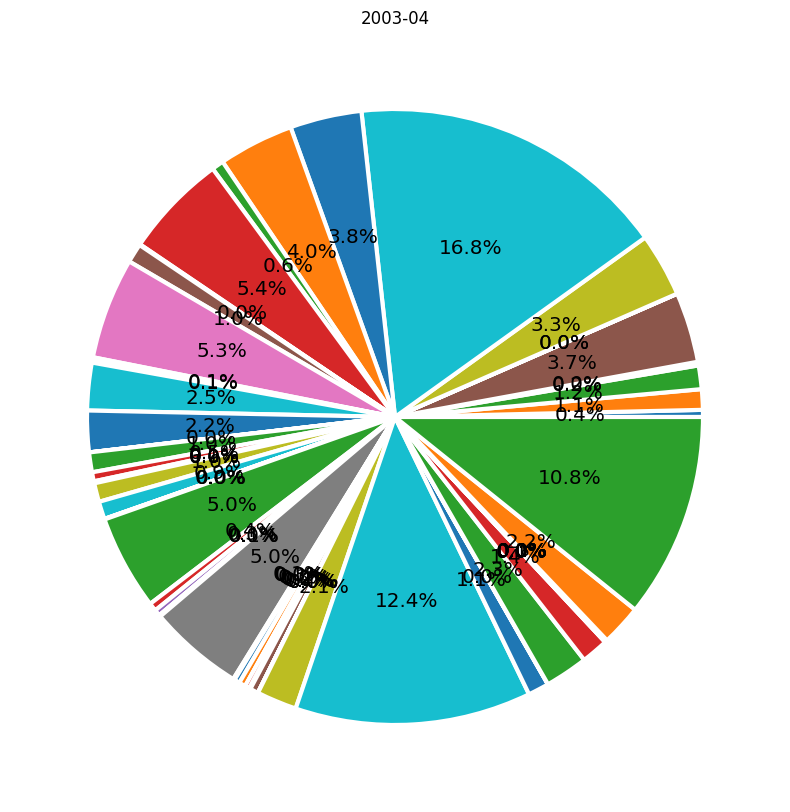

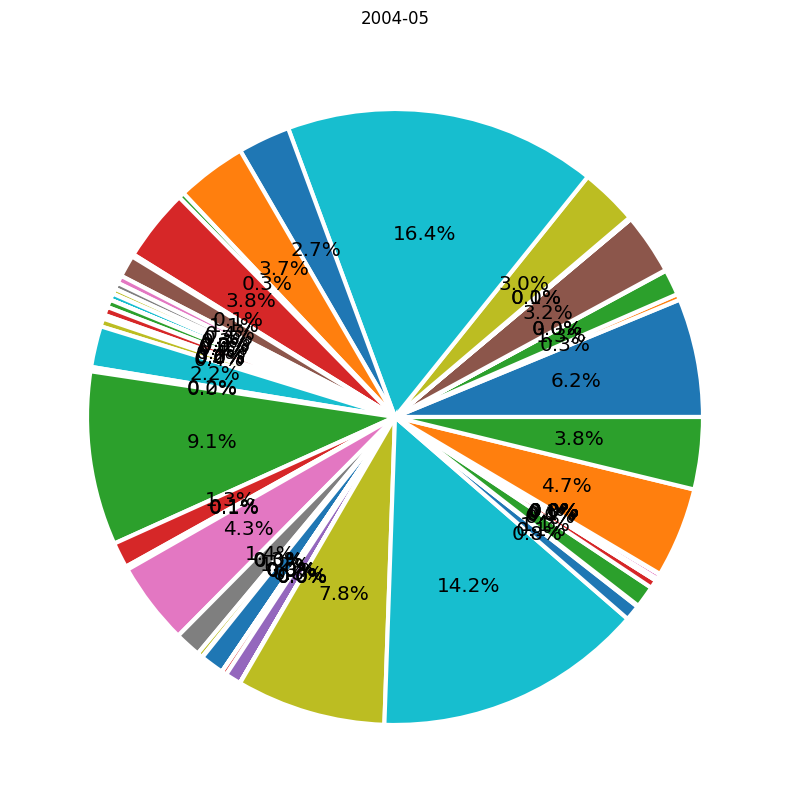

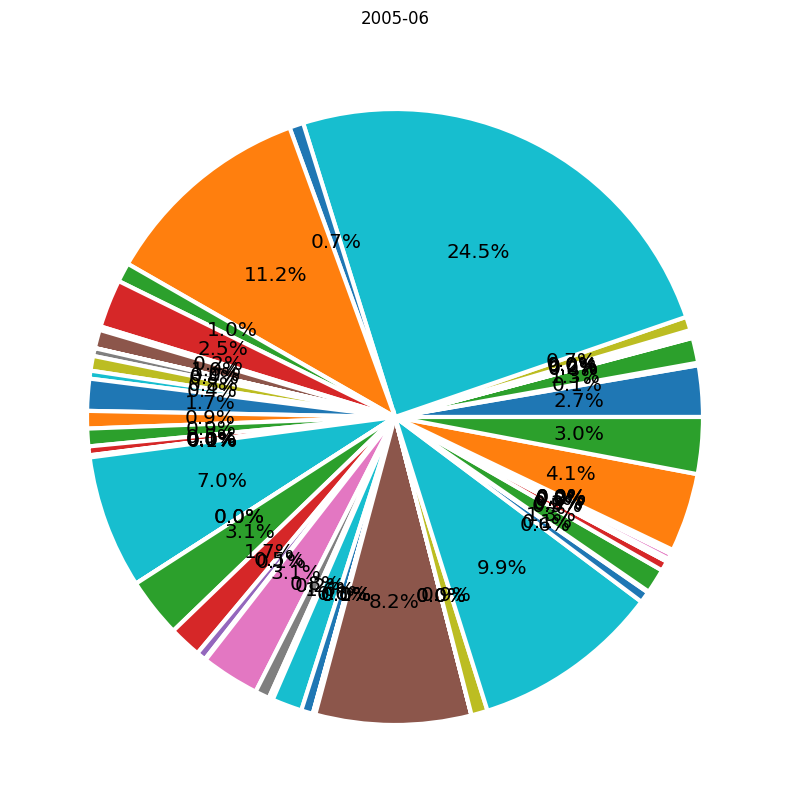

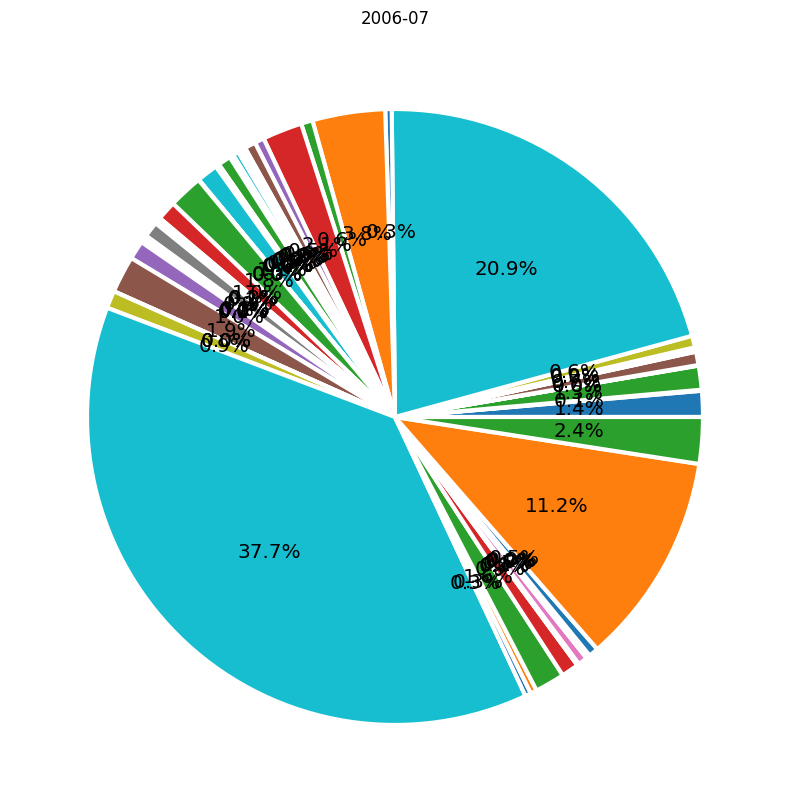

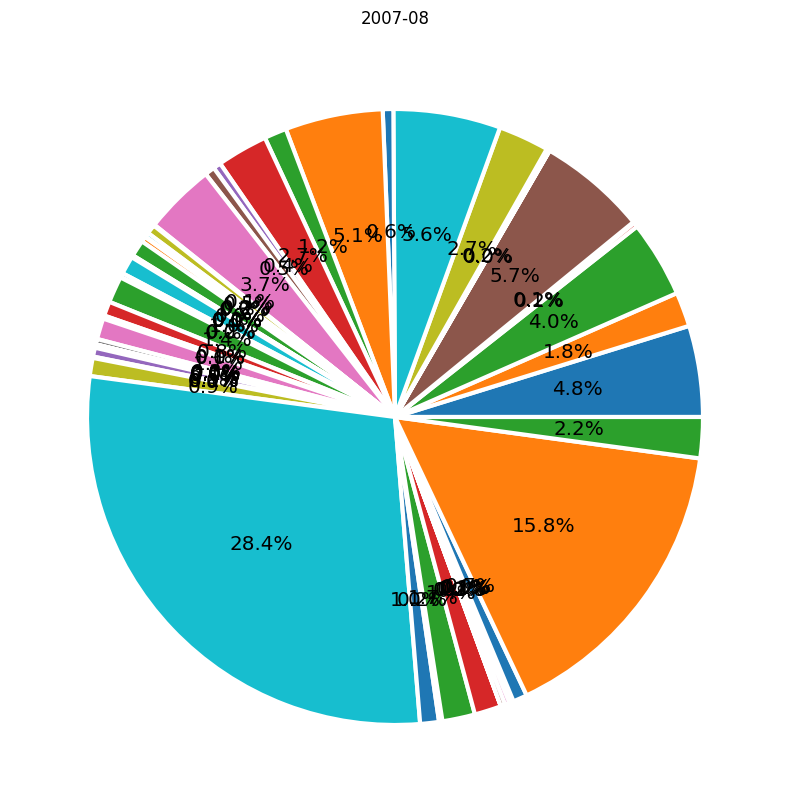

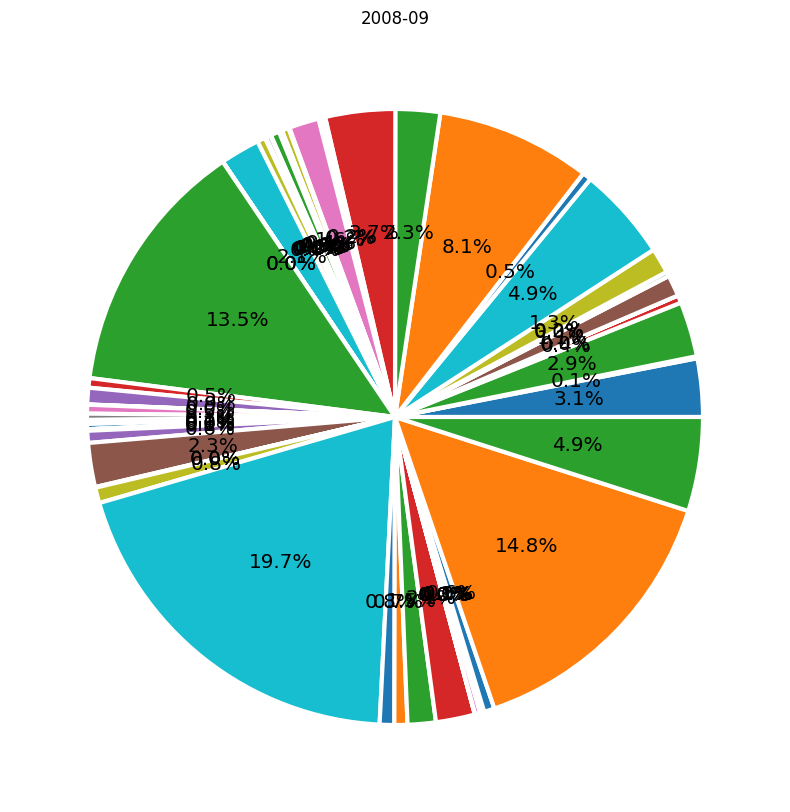

In [ ]:
# Making a convenience function
for i in col[1:10]:
  scaler = MinMaxScaler()
  train_df[i] = scaler.fit_transform(train_df[[i]])
  fig, ax = plt.subplots(figsize=(10,10))
  y = train_df[i]
  patches, texts, pcts = ax.pie(
    y, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large',})
  ax.set_title(train_df[i].name)